# APERO Demos

The aim of these demos is to walk you through some of the key steps in the
data reduction using APERO.

## Prerequisites for exercises

- Python 3.9  (e.g. via [conda](https://docs.conda.io/en/latest/miniconda.html))
    ```
    conda create --name=apero-demo python=3.9
    conda activate apero-demo
    pip install -r requirements.txt
    ```


- DS9 ([download](https://sites.google.com/cfa.harvard.edu/saoimageds9))


- dfits and fitsort
  - python implementation: [download](https://astrom-tom.github.io/dfitspy/build/html/installation.html)
  - C implmentation: [download](https://github.com/granttremblay/eso_fits_tools)


- Download the file bundle: [download](https://www.astro.umontreal.ca/~artigau/apero_demo/apero_nirps_demo.tar)


## Exercise 1: Cube to RAMP: Correlated double sampling (CDS)

- Step 1: Find the ramp and the cube for Proxima (HE)   HIERARCH ESO DPR TYPE = OBJECT,SKY  using dfits and fitsort (or python)
- Step 2: Load the cube in ds9
- Step 3: In DS9 play with the cube scaling (linear, log, histogram, min max, zscale etc)
- Step 4: In DS9 “Animate” the cube to see photons accumulating
- Step 5: In python create CDS “last minus first frame” from the cube. Express the resulting image in ADU/s
- Step 6: In DS9 compare to provided ramp image for Proxima


In [16]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

In [17]:
# notebook only
%matplotlib inline

In [18]:
# file containing a cube of NIRPS data
cube_file = 'NIRPS_2023-01-20T08_42_08_942.fits'

# file containing the equivalent ramp image
ramp_file = 'NIRPS_2023-01-20T08_42_08_941.fits'

In [19]:
# read the ramp file
slope = fits.getdata(ramp_file)
# read the cube of individual readouts
cube = fits.getdata(cube_file)
# read the header
header = fits.getheader(cube_file)

In [20]:
# we avoid byte wrapping for value below 0 in the CDS difference. Comment
# this line to see what goes wrong if yon don't do this!
cube = np.array(cube, dtype=float)

In [21]:
# duration the integration
inttime = header['HIERARCH ESO DET UIT']
print('Shape of the cube {}'.format(cube.shape))
# effective number of reads in difference
nreads_diff = cube.shape[0] - 1

Shape of the cube (37, 4096, 4096)


In [22]:
# constructing a correlated double sampling
# expressing as a rate of ADUs per second rather than ADUs
cds = (cube[-1] - cube[0]) / (inttime * nreads_diff)

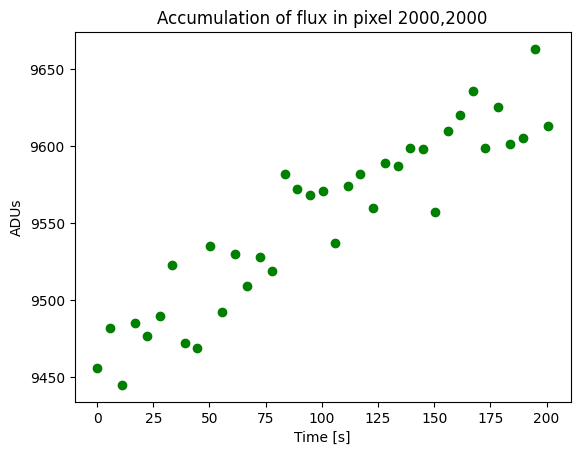

In [23]:
# plotting a random pixel growth
ypix, xpix = 2000, 2000  # pixel we want to look at
time = np.arange(cube.shape[0]) * inttime
plt.plot(time, cube[:, ypix, xpix], 'go')
plt.xlabel('Time [s]')
plt.ylabel('ADUs')
plt.title('Accumulation of flux in pixel {},{}'.format(ypix, xpix))
plt.show()
plt.close()

In [24]:
# in sample area, we find the RMS
rms_cds = np.nanstd(cds[10:20, 10:20])
rms_sloe = np.nanstd(slope[10:20, 10:20])


In [25]:
# print RMS values
print('RMS of constructed CDS image : {:.4f} ADU/s'.format(rms_cds))
print('RMS of provided slope image : {:.4f} ADU/s'.format(rms_sloe))

RMS of constructed CDS image : 0.1149 ADU/s
RMS of provided slope image : 0.0984 ADU/s


In [26]:
# save cds to file
fits.writeto('cds.fits', cds, header, overwrite=True)